In [40]:
import torch
import torchvision
from torchvision import transforms
from torch.utils import data
import matplotlib.pyplot as plt
from torch import nn

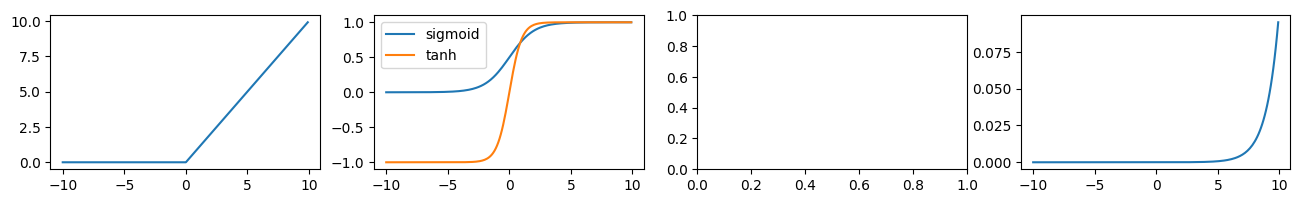

In [36]:
x = torch.arange(-10,10,0.1)
fig, axes = plt.subplots(1,4, figsize=(16,2))
axes = axes.flatten()
axes[0].plot(x,torch.relu(x))
axes[1].plot(x,torch.sigmoid(x), label='sigmoid')
axes[1].plot(x,torch.tanh(x), label='tanh')
axes[1].legend()
axes[3].plot(x,torch.softmax(x, dim=-1))

In [41]:
mnist_train = torchvision.datasets.FashionMNIST(
    root='../data', train=True, transform=transforms.ToTensor(), download=True
)
mnist_test = torchvision.datasets.FashionMNIST(
    root='../data', train=False, transform=transforms.ToTensor(), download=True
)

In [42]:
def init_weights(m):
    if type == nn.Linear:
        nn.init.normal_(m.weight, std=0.01)


def ac(data_iter, net):
    num_acs = []
    for x, y in data_iter:
        y_hat = net(x)
        maxs, indexs = torch.max(y_hat, dim=1)
        num_acs.append(y.eq(indexs).sum()/indexs.shape[0])
    return sum(num_acs)/len(num_acs)

batch_size = 256
num_epochs = 10
lr = 0.1
train_iter = data.DataLoader(mnist_train, batch_size, shuffle=True, num_workers=4)
test_iter = data.DataLoader(mnist_test, batch_size,shuffle=True, num_workers=4)
net = nn.Sequential(nn.Flatten(), nn.Linear(28*28, 256), nn.ReLU(), nn.Linear(256, 10))


net.apply(init_weights)
loss = nn.CrossEntropyLoss()
trainer = torch.optim.SGD(net.parameters(), lr=lr)

epoch:0, train iter ac:0.7918329238891602, test iter ac:0.7802734375
epoch:1, train iter ac:0.8195146322250366, test iter ac:0.810742199420929
epoch:2, train iter ac:0.8323027491569519, test iter ac:0.814257800579071
epoch:3, train iter ac:0.839805006980896, test iter ac:0.828906238079071
epoch:4, train iter ac:0.8476285338401794, test iter ac:0.8358398675918579
epoch:5, train iter ac:0.8387743830680847, test iter ac:0.821093738079071
epoch:6, train iter ac:0.8607990145683289, test iter ac:0.841503918170929
epoch:7, train iter ac:0.8688884973526001, test iter ac:0.853320300579071
epoch:8, train iter ac:0.860156238079071, test iter ac:0.84326171875
epoch:9, train iter ac:0.8660460710525513, test iter ac:0.8433593511581421


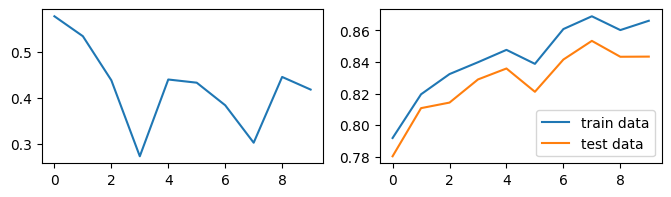

In [44]:
train_acs = []
test_acs = []
losss = []
for i in range(num_epochs):
    for x, y in train_iter:
        y_hat = net(x)
        l = loss(y_hat, y)
        trainer.zero_grad()
        l.backward()
        trainer.step()
        

    train_ac = ac(train_iter, net)
    test_ac = ac(test_iter, net)
    train_acs.append(train_ac)
    test_acs.append(test_ac)
    losss.append(l.detach().numpy())
    print('epoch:{}, train iter ac:{}, test iter ac:{}'.format(
        i, train_ac, test_ac))
fig, axes = plt.subplots(1,2, figsize=(8,2))
axes = axes.flatten()
axes[0].plot(range(10), losss)
axes[1].plot(range(10), train_acs, label='train data')
axes[1].plot(range(10), test_acs, label='test data')
axes[1].legend()